In [1]:
import cv2
import numpy as np
from skimage.data import coins
import matplotlib.pyplot as plt

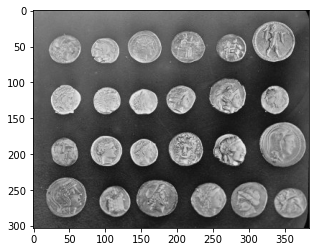

In [2]:
image = coins()
plt.imshow(image, cmap="gray")

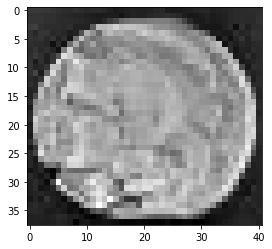

In [3]:
smallCoin = coins()[37:37+38, 80:80+41] 
plt.imshow(smallCoin, cmap="gray")

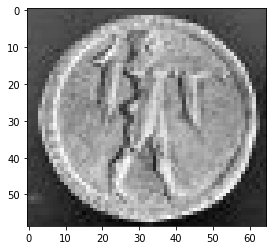

In [4]:
largeCoin = coins()[14:14+59,302:302+65]
plt.imshow(largeCoin, cmap="gray")

**Template Matching**

Your Implementation .Without use Python libraries (skimage , opencv , ...)
find two templates above in the main image. 



In [5]:
# A function to match a template with an image
def match_template(I, T, th=None):
    h, w = I.shape
    kh, kw = T.shape
    Tprime = T - T.mean()
    R = np.zeros((h - kh + 1, w - kw + 1))
    for i in range(h-kh+1):
        for j in range(w-kw+1):
            patch = I[i:i+kh, j:j+kw]
            patch_prime = patch - patch.mean()
            R[i, j] = (patch_prime * Tprime).sum()
            R[i, j] /= ((Tprime ** 2).sum() + (patch_prime ** 2).sum()) ** 0.5
    if not th:
        maximum = R.max()
        loc = np.where(R >= maximum)
        return loc
    else:
        loc = np.where(R >= th)
        return loc
    return loc


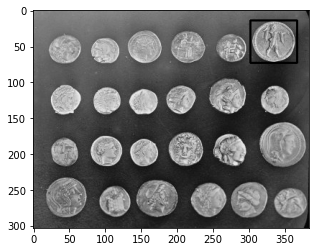

In [6]:
# Large coin template matching
image = coins()
template = largeCoin 
kw, kh = template.shape[::-1]
loc = match_template(image, template)
for pt in zip(*loc[::-1]):
    cv2.rectangle(image, pt, (pt[0] + kw, pt[1] + kh), (0,255,255), 2)
plt.imshow(image, cmap='gray')

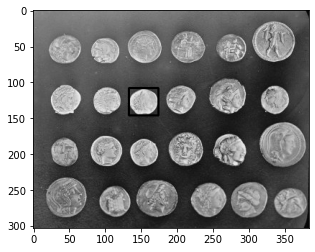

In [7]:
# Small coin template matching
image = coins()
template = smallCoin 
kw, kh = template.shape[::-1]
loc = match_template(image, template)
for pt in zip(*loc[::-1]):
    cv2.rectangle(image, pt, (pt[0] + kw, pt[1] + kh), (0,255,255), 2)
plt.imshow(image, cmap='gray')

show the found matches on coins image.